## Full Linear Regression HW
### Jack Farmer, 20 September 2023

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

cardata = pd.read_csv('auto-mpg.csv')

cardata.head()

for c in cardata.columns:
    cardata[c] = pd.to_numeric(cardata[c], errors='coerce')
    
hp_med = cardata['horsepower'].median()
cardata['horsepower'] = cardata['horsepower'].fillna(hp_med)


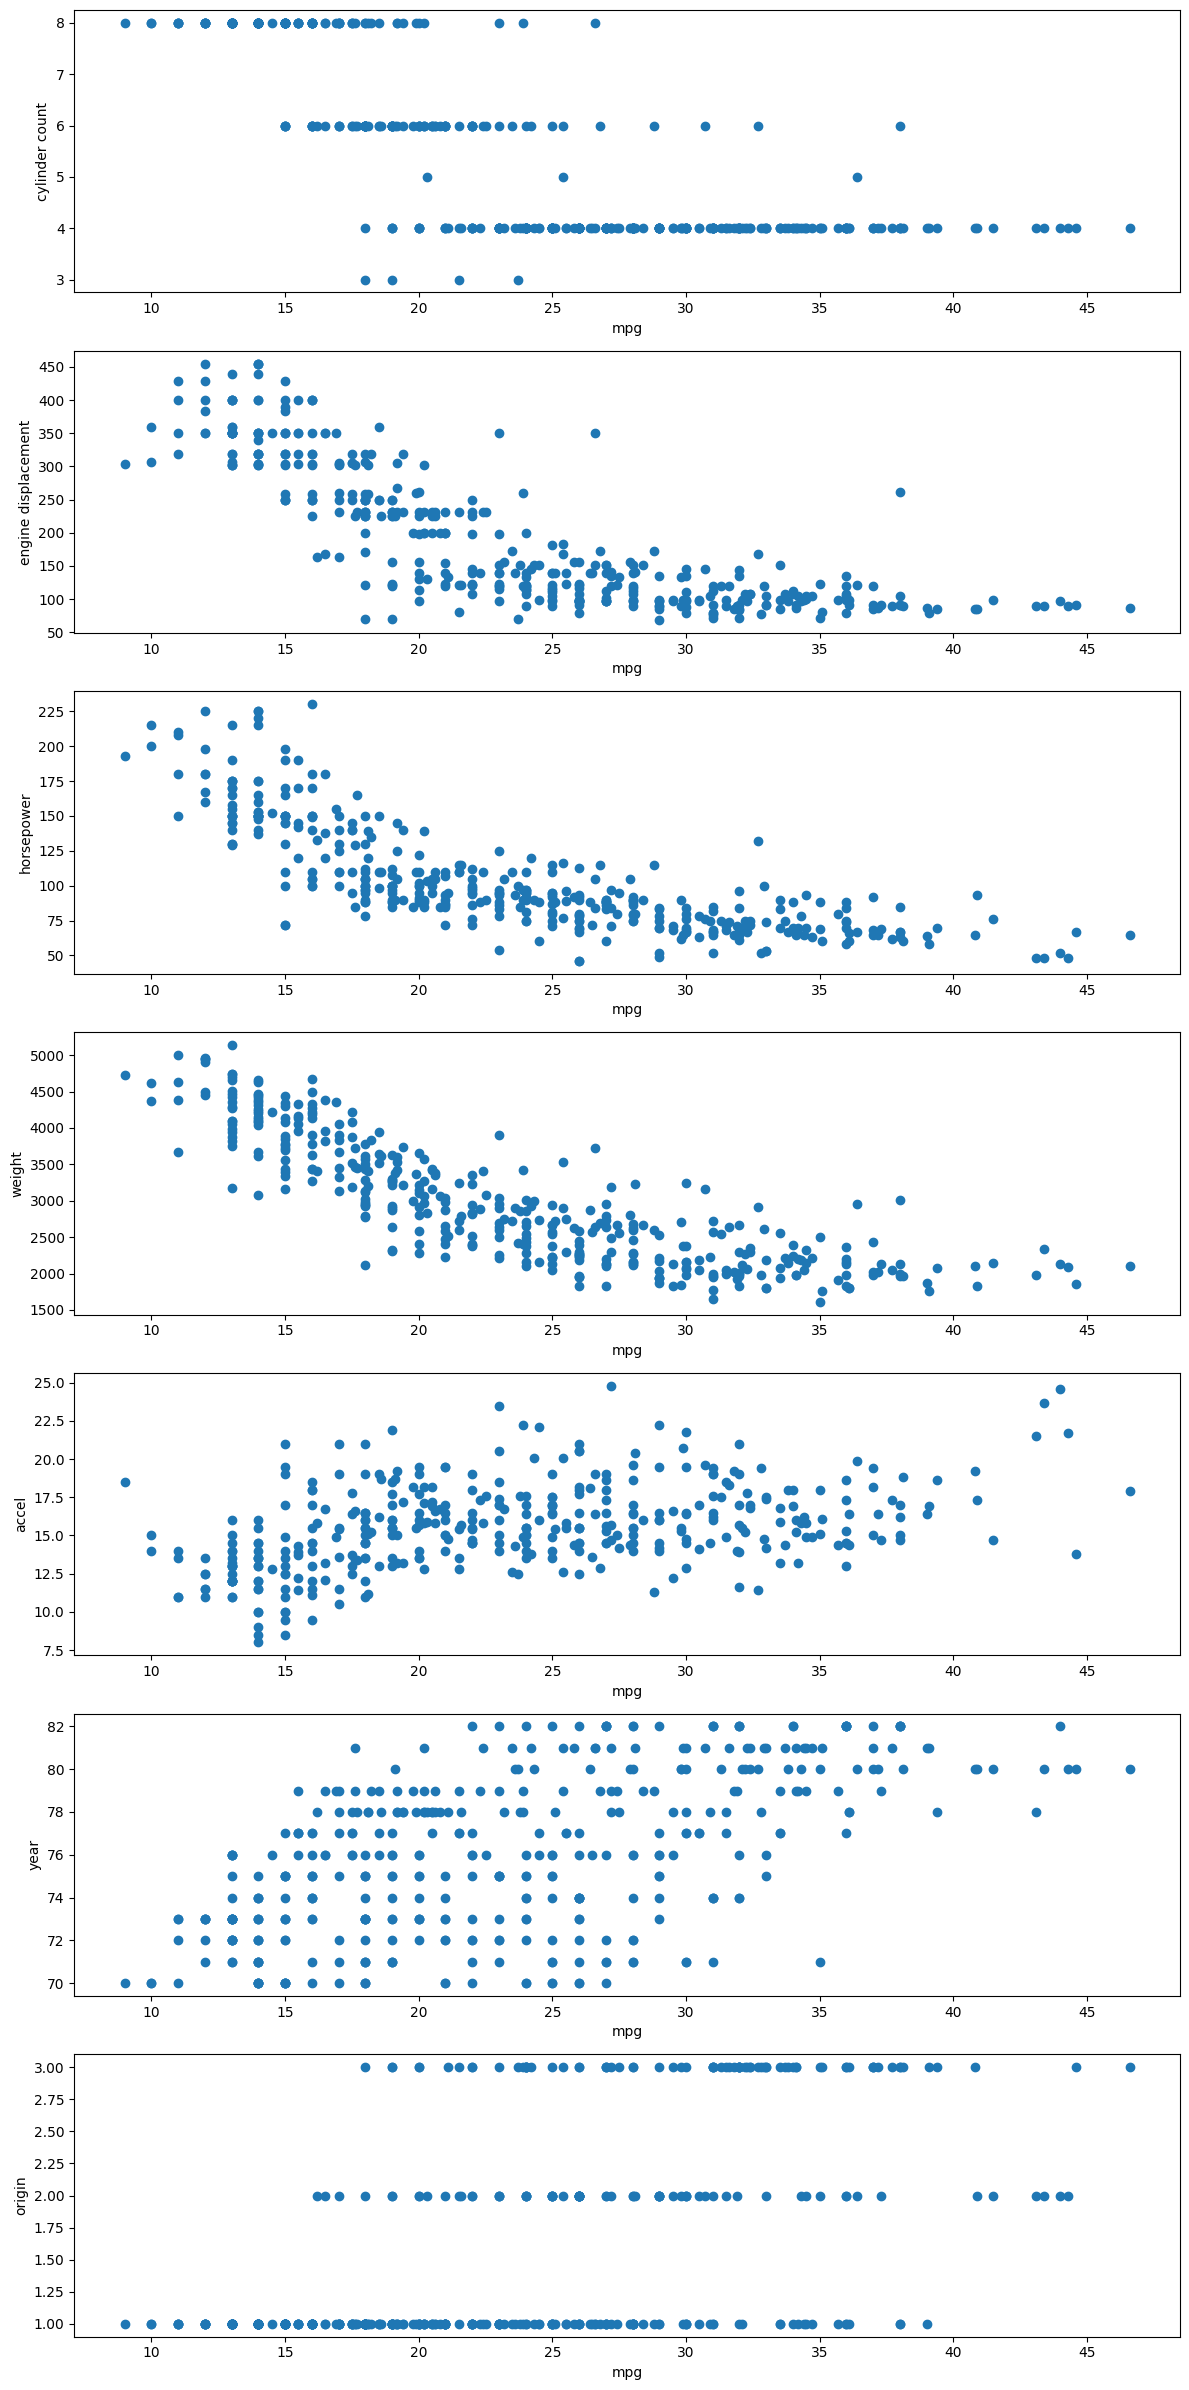

In [41]:
fig, ax = plt.subplots(7, 1, figsize=(12, 24))

ax[0].scatter(cardata['mpg'], cardata['cylinders'])
ax[0].set_xlabel('mpg')
ax[0].set_ylabel('cylinder count')

ax[1].scatter(cardata['mpg'], cardata['displacement'])
ax[1].set_xlabel('mpg')
ax[1].set_ylabel('engine displacement')

ax[2].scatter(cardata['mpg'], cardata['horsepower'])
ax[2].set_xlabel('mpg')
ax[2].set_ylabel('horsepower')

ax[3].scatter(cardata['mpg'], cardata['weight'])
ax[3].set_xlabel('mpg')
ax[3].set_ylabel('weight')

ax[4].scatter(cardata['mpg'], cardata['acceleration'])
ax[4].set_xlabel('mpg')
ax[4].set_ylabel('accel')

ax[5].scatter(cardata['mpg'], cardata['model year'])
ax[5].set_xlabel('mpg')
ax[5].set_ylabel('year')

ax[6].scatter(cardata['mpg'], cardata['origin'])
ax[6].set_xlabel('mpg')
ax[6].set_ylabel('origin')

plt.tight_layout()
plt.show()

In [42]:
## normalization thyme

cardata['cylinders_n'] = (cardata['cylinders'] - cardata['cylinders'].mean()) / cardata['cylinders'].std()

cardata['displacement_n'] = (cardata['displacement'] - cardata['displacement'].mean()) / cardata['displacement'].std()

cardata['horsepower_n'] = (cardata['horsepower'] - cardata['horsepower'].mean()) / cardata['horsepower'].std()

cardata['weight_n'] = (cardata['weight'] - cardata['weight'].mean()) / cardata['weight'].std()

cardata['acceleration_n'] = (cardata['acceleration'] - cardata['acceleration'].mean()) / cardata['acceleration'].std()

cardata['model_year_n'] = (cardata['model year'] - cardata['model year'].mean()) / cardata['model year'].std()

cardata['origin_n'] = (cardata['origin'] - cardata['origin'].mean()) / cardata['origin'].std()

model = smf.ols(formula='mpg ~ cylinders_n + displacement_n + horsepower_n + weight_n + acceleration_n + model_year_n + origin_n', data=cardata)
results = model.fit()
cardata['residual'] = results.resid
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          2.15e-141
Time:                        15:50:34   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         23.5146      0.167    140.

In [43]:
model_step5 = smf.ols(formula='mpg ~ weight_n + model_year_n + origin_n', data=cardata)
results_step5 = model_step5.fit()
cardata['residual_step5'] = results_step5.resid
print(results_step5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     587.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.96e-145
Time:                        15:50:34   Log-Likelihood:                -1044.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     394   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.5146      0.168    139.907   

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.6
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          1.13e-157
Time:                        15:50:34   Log-Likelihood:                -945.09
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     369   BIC:                             2064.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

(array([  5.,  17.,  42., 110., 144.,  53.,  14.,   8.,   1.,   4.]),
 array([-7.96462832, -6.0652216 , -4.16581487, -2.26640815, -0.36700143,
         1.53240529,  3.43181201,  5.33121874,  7.23062546,  9.13003218,
        11.0294389 ]),
 <BarContainer object of 10 artists>)

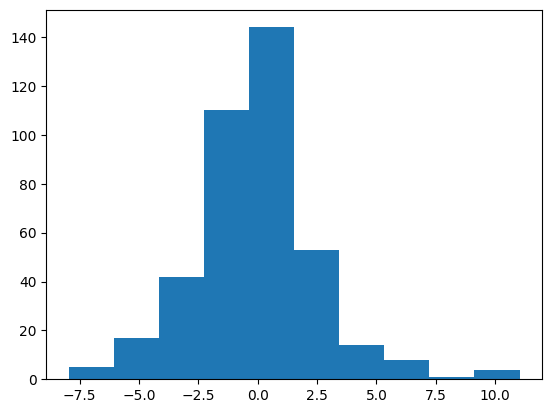

In [44]:
model_step6 = smf.ols(formula='mpg ~ cylinders_n + displacement_n + horsepower_n + weight_n + acceleration_n + model_year_n + origin_n + cylinders_n*displacement_n + cylinders_n*horsepower_n +cylinders_n*weight_n + cylinders_n*acceleration_n + cylinders_n*model_year_n + cylinders_n*origin_n + displacement_n*horsepower_n + displacement_n*weight_n + displacement_n*acceleration_n +displacement_n*model_year_n + displacement_n*origin_n +horsepower_n*weight_n + horsepower_n*acceleration_n + horsepower_n*model_year_n + horsepower_n*origin_n + weight_n*acceleration_n + weight_n*model_year_n + weight_n*origin_n + acceleration_n*model_year_n + acceleration_n*origin_n + model_year_n*origin_n', data=cardata)

results_step6 = model_step6.fit()
cardata['residual_step6'] = results_step6.resid

print(results_step6.summary())
plt.hist(cardata['residual_step6'])


We see that the 
- normalized horsepower,
- weight,
- model year,
- origin, 
- dispacement & weight,
- accel & model year,
- accel & origin,
- and model year & origin

are significant interaction terms

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     278.5
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          6.02e-170
Time:                        15:50:34   Log-Likelihood:                -963.96
No. Observations:                 398   AIC:                             1950.
Df Residuals:                     387   BIC:                             1994.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

(array([  2.,  16.,  53., 118., 137.,  50.,  11.,   6.,   3.,   2.]),
 array([-8.59249894, -6.47734232, -4.3621857 , -2.24702908, -0.13187245,
         1.98328417,  4.09844079,  6.21359741,  8.32875403, 10.44391065,
        12.55906728]),
 <BarContainer object of 10 artists>)

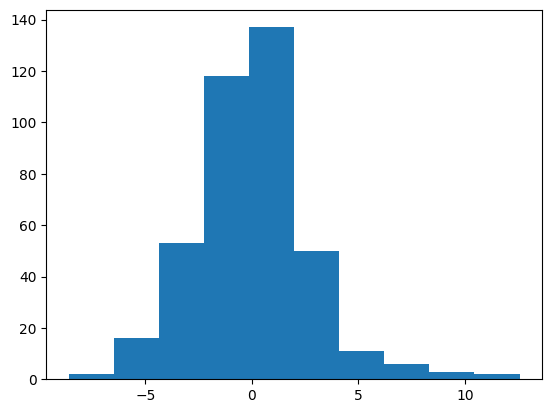

In [45]:
model_step8 = smf.ols(formula='mpg ~ horsepower_n + weight_n + model_year_n + origin_n + displacement_n*weight_n + acceleration_n*model_year_n + acceleration_n*origin_n + model_year_n*origin_n', data=cardata)

results_step8 = model_step8.fit()
cardata['residual_step8'] = results_step8.resid


print(results_step8.summary())
plt.hist(cardata['residual_step8'])

In [46]:
std = np.std(cardata['residual_step8'])
print(f'Final residual standard deviation: {std}')

Final residual standard deviation: 2.7266594429280144


### Results

As seen above, the final residual standard deviation was ~2.76



Thank you for coming to my ted talk :)